### Import Libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [1960]:
df1=pd.read_csv("ipl.csv")
df1,df1.shape

(           id   season        city        date   match_type  player_of_match  \
 0      335982  2007/08   Bangalore  18-04-2008       League      BB McCullum   
 1      335983  2007/08  Chandigarh  19-04-2008       League       MEK Hussey   
 2      335984  2007/08       Delhi  19-04-2008       League      MF Maharoof   
 3      335985  2007/08      Mumbai  20-04-2008       League       MV Boucher   
 4      335986  2007/08     Kolkata  20-04-2008       League        DJ Hussey   
 ...       ...      ...         ...         ...          ...              ...   
 1090  1426307     2024   Hyderabad  19-05-2024       League  Abhishek Sharma   
 1091  1426309     2024   Ahmedabad  21-05-2024  Qualifier 1         MA Starc   
 1092  1426310     2024   Ahmedabad  22-05-2024   Eliminator         R Ashwin   
 1093  1426311     2024     Chennai  24-05-2024  Qualifier 2    Shahbaz Ahmed   
 1094  1426312     2024     Chennai  26-05-2024        Final         MA Starc   
 
                          

In [1962]:
df2=pd.read_csv("ipl2.csv")
df2,df2.shape

(        match_id  inning           batting_team                 bowling_team  \
 0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
 1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
 2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
 3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
 4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
 ...          ...     ...                    ...                          ...   
 260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
 260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
 260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
 260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
 260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
 
         over  ball       

### Questions
1. Top 5 highest run scorers of all time.

2. Top 1 wicket-taker bowler of each season.

3. Top 5 bowlers who took the most number of 5-wicket hauls (fifers).

4. Team with the highest win percentage in each season.

5. Most dominating team at their home ground.

6. Team with the most successful chasing record.

7. Most competitive matches (narrow margin wins).

8. Top 5 high-scoring matches of all time.

9. Season with the most number of centuries scored.

10. Trend of average runs per over (RPO) across seasons.

In [1984]:
df.head(3)

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [1966]:
df2.rename(columns={'match_id':'id'},inplace=True)

In [1968]:
df=pd.merge(left=df2,right=df1,left_on='id',right_on='id',how='outer') #merging both columns on basis of id

In [1986]:
pd.set_option('display.max_columns',None)
df.head(3)

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


<Axes: >

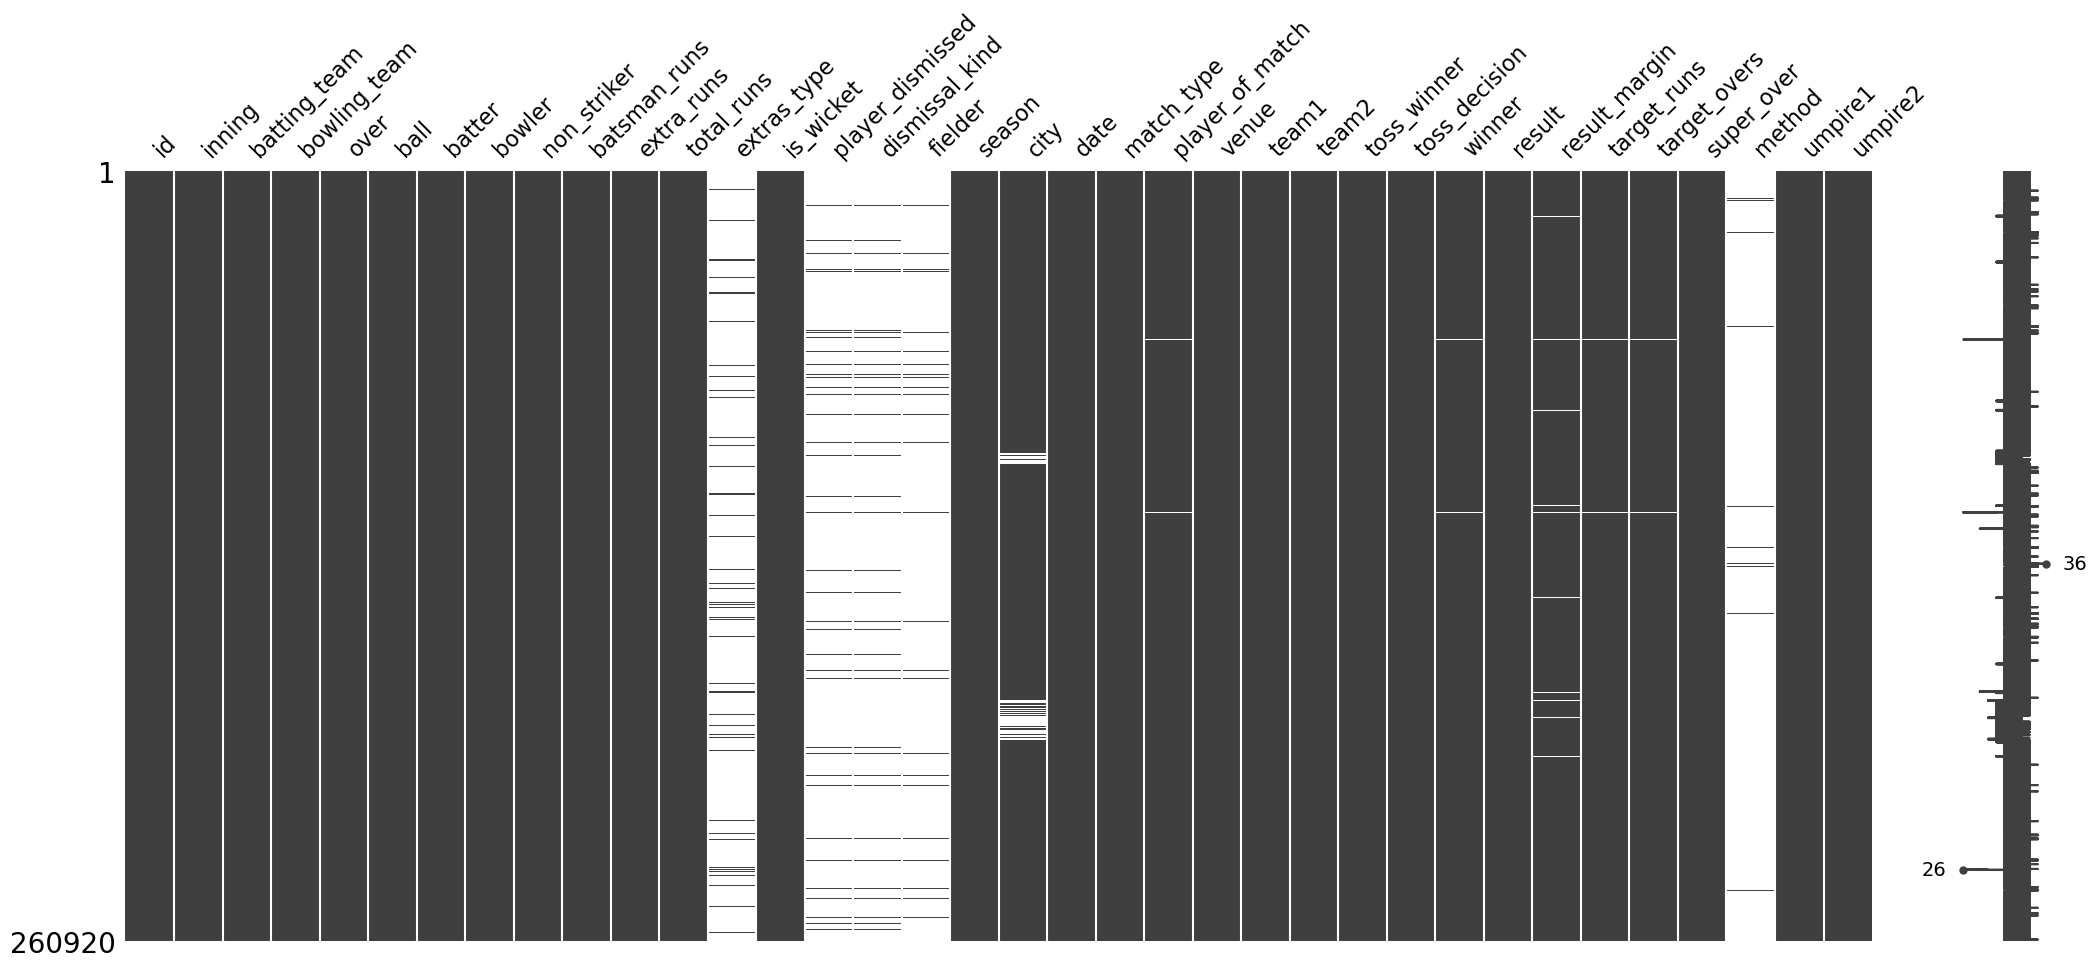

In [46]:
missingno.matrix(df)

In [1982]:
df5=df[df['inning']<=2] #Excluding super-over Runs


####  TOP 5 Highest-Runs in a Single IPL match


In [56]:
#TOP 5 Highest-Runs in a Single IPL match
df.groupby(['batter','id'])['batsman_runs'].sum().sort_values(ascending=False).head(5)

batter          id     
CH Gayle        598027     175
BB McCullum     335982     158
Q de Kock       1304112    140
AB de Villiers  829795     133
KL Rahul        1216510    132
Name: batsman_runs, dtype: int64

#### 1) TOP 5 Highest-Runs scorer in IPL 


In [1980]:
#TOP 5 Highest-Runs scorer in IPL
df5.groupby(['batter'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(5)

,batter,batsman_runs
631,V Kohli,8004
512,S Dhawan,6769
477,RG Sharma,6628
147,DA Warner,6565
546,SK Raina,5528


#### 2) Top 1 wicket-taker bowler of each season in IPL.
#### { Purple Cap Winners }

In [2023]:
df['date']=pd.to_datetime(df['date'])
df['season']=df.date.dt.year

C:\Users\hp\AppData\Local\Temp\ipykernel_21452\1639970346.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date']=pd.to_datetime(df['date'])


In [1623]:
Season=df.season.unique()
Season

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024])

In [1639]:
df2=df[(df['dismissal_kind']!='run out')&(df['dismissal_kind']!='obstructing the field')&(df['dismissal_kind']!='retired out')&(df['dismissal_kind']!='retired hurt')&(df['inning']<=2)]

In [1641]:
l=([])
for i in Season:
    x=df2[df2['season']==i]
    l.append(x.groupby(['bowler','season'])['is_wicket'].sum().reset_index().sort_values(by=['season','is_wicket'],ascending=False).values[0])

In [1643]:
#Top 1 wicket-taker bowler of each season in IPL.
l=pd.DataFrame(l,columns=['bowler','season','Total_Wickets'])
l

,bowler,season,Total_Wickets
0,Sohail Tanvir,2008,22
1,RP Singh,2009,23
2,PP Ojha,2010,21
3,SL Malinga,2011,28
4,M Morkel,2012,25
5,DJ Bravo,2013,32
6,MM Sharma,2014,23
7,DJ Bravo,2015,26
8,B Kumar,2016,23
9,B Kumar,2017,26


In [1649]:
l.sort_values(by='Total_Wickets',ascending=False).head(5)

,bowler,season,Total_Wickets
5,DJ Bravo,2013,32
13,HV Patel,2021,32
12,K Rabada,2020,30
15,Mohammed Shami,2023,28
3,SL Malinga,2011,28


#### 4) Team with the highest win percentage in each season.


In [158]:
Teams=df.team1.unique()

In [256]:
l={}
for i in Season:
    wins=0
    team=""
    for j in Teams:
        x=len(df[(df['winner']==j)&(df['season']==i)])
        y=len(df[((df['team1']==j) | (df['team2']==j))&(df['season']==i)])
        if y!=0:
            z=round((x/y)*100,2)
            if z >=wins:
                wins=z
                team=j
        l[i]=[team,wins]




In [258]:
#Team with the highest win percentage in each season.
pd.DataFrame(l).T

,0,1
2008,Rajasthan Royals,82.29
2009,Delhi Daredevils,65.56
2010,Mumbai Indians,68.94
2011,Chennai Super Kings,70.71
2012,Kolkata Knight Riders,72.4
2013,Chennai Super Kings,69.27
2014,Kings XI Punjab,70.64
2015,Mumbai Indians,62.71
2016,Sunrisers Hyderabad,64.93
2017,Mumbai Indians,70.01


#### 5) Most dominating team at their home ground.

In [1999]:
HTW=pd.DataFrame({'mumbai':(len(df.query('((`team1`=="Mumbai Indians")|(`team2`=="Mumbai Indians"))&(`winner`=="Mumbai Indians")&(`city`==["Mumbai","Navi Mumbai"])'))/len(df.query('`city`==["Mumbai","Navi Mumbai"]')))*100,
'chennai':(len(df.query('((`team1`=="Chennai Super Kings")|(`team2`=="Chennai Super Kings"))&(`winner`=="Chennai Super Kings")&(`city`=="Chennai")'))/len(df.query('`city`=="Chennai"')))*100,
'Kolkata':(len(df.query('((`team1`=="Kolkata Knight Riders")|(`team2`=="Kolkata Knight Riders"))&(`winner`=="Kolkata Knight Riders")&(`city`=="Kolkata")'))/len(df.query('`city`=="Kolkata"')))*100,
'Banglore':(len(df.query('((`team1`=="Royal Challengers Bangalore")|(`team2`=="Royal Challengers Bangalore"))&(`winner`==["Royal Challengers Bangalore","Royal Challengers Bengaluru"])&(`city`=="Bangalore")'))/len(df.query('`city`=="Bangalore"')))*100,
'Rajasthan':(len(df.query('((`team1`=="Rajasthan Royals")|(`team2`=="Rajasthan Royals"))&(`winner`=="Rajasthan Royals")&(`city`=="Jaipur")'))/len(df.query('`city`=="Jaipur"')))*100,
'delhi':(len(df.query('((`team1`==["Delhi Daredevils","Delhi Captials"])|(`team2`==["Delhi Daredevils","Delhi Captials"]))&(`winner`==["Delhi Daredevils","Delhi Captials"])&(`city`=="Delhi")'))/len(df.query('`city`=="Delhi"')))*100,
'srh':(len(df.query('((`team1`=="Sunrisers Hyderabad")|(`team2`=="Sunrisers Hyderabad"))&(`winner`=="Sunrisers Hyderabad")&(`city`=="Hyderabad")'))/len(df.query('`city`=="Hyderabad"')))*100,
'Gujarat':(len(df.query('((`team1`==["Gujarat Lions","Gujarat Titans"])|(`team2`==["Gujarat Lions","Gujarat Titans"]))&(`winner`==["Gujarat Lions","Gujarat Titans"])&(`city`=="Ahmedabad")'))/len(df.query('`city`=="Ahmedabad"')))*100,
'punjab':(len(df.query('((`team1`==["Kings XI Punjab","Punjab Kings"])|(`team2`==["Kings XI Punjab","Punjab Kings"]))&(`winner`==["Kings XI Punjab","Punjab Kings"])&(`city`==["Dharamsala","Indore","Mohali"])'))/len(df.query('`city`==["Dharamsala","Indore","Mohali"]')))*100},index=[0])


 

In [2001]:
HTW=HTW.T.reset_index().rename(columns={'index':'Teams',0:'Home_wins'})
HTW

,Teams,Home_wins
0,mumbai,35.631687
1,chennai,58.823529
2,Kolkata,55.442644
3,Banglore,44.033005
4,Rajasthan,65.170118
5,delhi,30.090742
6,srh,46.837374
7,Gujarat,25.768736
8,punjab,37.517742


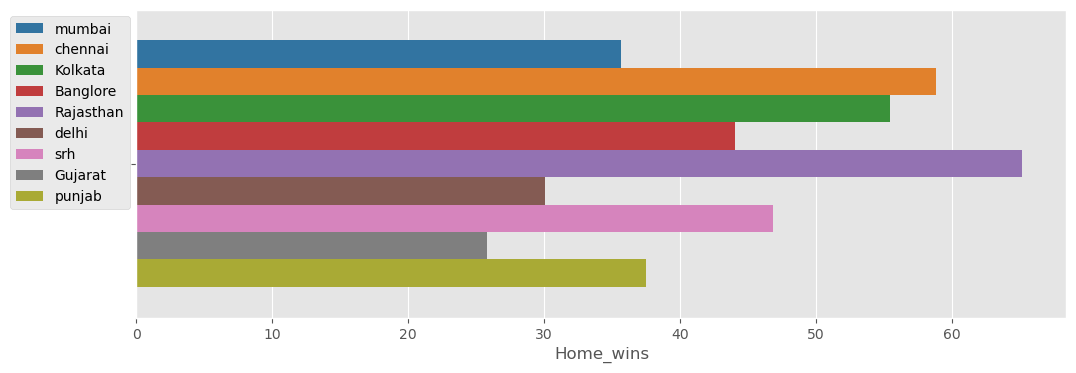

In [2003]:
plt.figure(figsize=(12,4))
sns.barplot(x=HTW.Home_wins,hue=HTW.Teams,palette='tab10')
plt.legend(bbox_to_anchor=[0,1])
plt.style.use('ggplot')

#### 6) Highest Successful Run Chases of all time in IPL 

In [679]:
df3=df[df['inning']==2]

In [695]:
l=[]
for i in Teams:
    new=df3[(df3.batting_team ==i)&(df3.winner==i)]
    l.append(new[['id','winner','target_runs','bowling_team']])
u=pd.concat(l,ignore_index=True)

In [2005]:
u.drop_duplicates(subset='id',inplace=True)
u.sort_values(by='target_runs',ascending=False).head(10)


,id,winner,target_runs,bowling_team
61717,1426280,Punjab Kings,262.0,Kolkata Knight Riders
38285,1216527,Rajasthan Royals,224.0,Punjab Kings
40109,1426269,Rajasthan Royals,224.0,Kolkata Knight Riders
23075,1254084,Mumbai Indians,219.0,Chennai Super Kings
55003,1359526,Sunrisers Hyderabad,215.0,Rajasthan Royals
55299,1426307,Sunrisers Hyderabad,215.0,Punjab Kings
33107,335990,Rajasthan Royals,215.0,Deccan Chargers
24061,1359520,Mumbai Indians,215.0,Punjab Kings
23936,1359516,Mumbai Indians,213.0,Rajasthan Royals
62415,1359489,Lucknow Super Giants,213.0,Royal Challengers Bangalore


####  Most Sucessfull Team in Run chase


In [1334]:
l=[]
for i in Teams:
    new=df3[(df3.batting_team ==i)&(df3.winner==i)]
    l.append(new[['id','winner','target_runs','bowling_team']])
u=pd.concat(l,ignore_index=True)

In [1392]:
u.drop_duplicates(subset='id',inplace=True)
u.replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore','Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings','Gujarat Titans':'Gujarat Lions','Rising Pune Supergiant':'Rising Pune Supergiants' },inplace=True)

In [1394]:
x=u.winner.value_counts()

<Figure size 1200x1000 with 0 Axes>

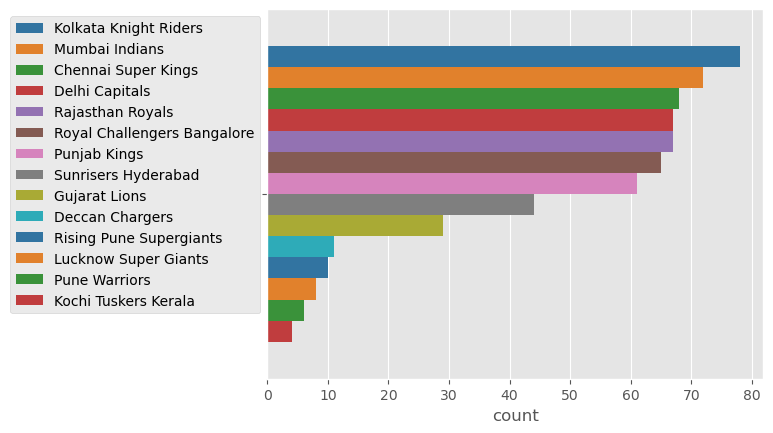

<Figure size 1200x1000 with 0 Axes>

In [1396]:
#Most Sucessfull Team in Run chase
X=pd.DataFrame(x)
X.reset_index(inplace=True)
sns.barplot(x=X['count'],hue=X['winner'],palette='tab10')
plt.legend(bbox_to_anchor=[0,1])
plt.figure(figsize=(12,10))

#### 8) Top 5 high-scoring matches of all time.


In [1660]:
#team1= First inning batting Team
#team2= Second inning batting Team
df4=df[df['inning']<=2]
df4.groupby(['id','inning','team1','team2']).agg(total=('total_runs','sum')).reset_index().sort_values(by='total',ascending=False).head(10)

,id,inning,team1,team2,total
2103,1426268,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,287
2059,1422126,1,Sunrisers Hyderabad,Mumbai Indians,277
2075,1422134,1,Kolkata Knight Riders,Delhi Capitals,272
2113,1426273,1,Sunrisers Hyderabad,Delhi Capitals,266
701,598027,1,Royal Challengers Bangalore,Pune Warriors,263
2128,1426280,2,Kolkata Knight Riders,Punjab Kings,262
2104,1426268,2,Sunrisers Hyderabad,Royal Challengers Bengaluru,262
2127,1426280,1,Kolkata Knight Riders,Punjab Kings,261
1972,1359512,1,Lucknow Super Giants,Punjab Kings,257
2129,1426281,1,Delhi Capitals,Mumbai Indians,257


#### 7) Most competitive matches (narrow margin wins).


In [2076]:
df.result.unique()

array(['runs', 'wickets', 'tie', 'no result'], dtype=object)

#### By Runs

In [2078]:
df6=df[df.result=='runs']
df6.sort_values(by='target_runs',inplace=True)
df6.drop_duplicates(subset='id',inplace=True)

x=df6[['id','team1','team2','winner','result_margin','target_runs','result']].sort_values(by=['result_margin']).head(20)
x.sort_values(by='target_runs',ascending=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_21452\2151774234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.sort_values(by='target_runs',inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_21452\2151774234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop_duplicates(subset='id',inplace=True)


,id,team1,team2,winner,result_margin,target_runs,result
252567,1426274,Kolkata Knight Riders,Royal Challengers Bengaluru,Kolkata Knight Riders,1.0,223.0,runs
223791,1304112,Lucknow Super Giants,Kolkata Knight Riders,Lucknow Super Giants,2.0,211.0,runs
255894,1426288,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,1.0,202.0,runs
10695,336028,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,1.0,190.0,runs
242179,1359542,Lucknow Super Giants,Kolkata Knight Riders,Lucknow Super Giants,1.0,177.0,runs
131634,980977,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,1.0,176.0,runs
127653,980945,Delhi Daredevils,Gujarat Lions,Gujarat Lions,1.0,173.0,runs
198934,1254079,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,1.0,172.0,runs
186625,1216523,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,2.0,165.0,runs
173966,1178414,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,1.0,162.0,runs


#### By Wickets

In [2057]:
df7=df[df.result=='wickets']
df7.sort_values(by='target_runs',inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_21452\2751145196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.sort_values(by='target_runs',inplace=True)


In [2071]:
df7.drop_duplicates(subset='id',inplace=True)
y=df7[['id','team1','team2','winner','result_margin','target_runs','result']].sort_values(by=['result_margin']).head(20)
y.sort_values(by='target_runs',ascending=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_21452\714187046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.drop_duplicates(subset='id',inplace=True)


,id,team1,team2,winner,result_margin,target_runs,result
251254,1426269,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,2.0,224.0,wickets
229561,1359489,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,1.0,213.0,wickets
147999,1082640,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,2.0,196.0,wickets
118941,829791,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,1.0,184.0,wickets
69874,548355,Mumbai Indians,Chennai Super Kings,Mumbai Indians,2.0,174.0,wickets
203269,1254098,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,2.0,172.0,wickets
214899,1304075,Chennai Super Kings,Gujarat Titans,Gujarat Titans,3.0,170.0,wickets
21279,392216,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,3.0,169.0,wickets
155262,1136581,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,3.0,168.0,wickets
150482,1136561,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,1.0,166.0,wickets


In [862]:
x=df.groupby(['id','season','batter']).agg(score=('batsman_runs','sum')).reset_index().sort_values(by='score',ascending=False)

#### 9) Season with the most number of centuries scored.

In [878]:

y=x[x['score']>=100]
pd.DataFrame(y.season.value_counts()).reset_index()

,season,count
0,2024,14
1,2023,12
2,2022,8
3,2016,7
4,2019,6
5,2011,6
6,2012,6
7,2008,6
8,2017,5
9,2018,5


#### 10) Trend of average runs per over (RPO) across seasons.

In [2025]:
x=df[['id','over','season','total_runs']]
y=x.groupby(['season']).agg(runs=('total_runs','sum'),balls=('id','count')).reset_index()
y['overs']=y.balls.apply(lambda x:round(x/6,2))

In [2027]:
y['RPO']=y.runs/y.overs
y

,season,runs,balls,overs,RPO
0,2008,17937,13489,2248.17,7.978489
1,2009,16353,13606,2267.67,7.211367
2,2010,18883,14498,2416.33,7.814744
3,2011,21154,17013,2835.50,7.460413
4,2012,22453,17767,2961.17,7.582476
5,2013,22602,18177,3029.50,7.460637
6,2014,18931,14300,2383.33,7.943088
7,2015,18353,13652,2275.33,8.066083
8,2016,18862,14096,2349.33,8.028672
9,2017,18786,13862,2310.33,8.131306


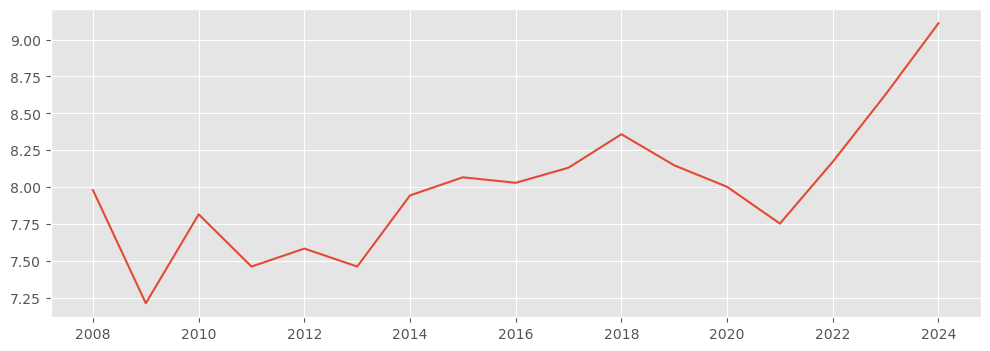

In [2033]:
plt.figure(figsize=(12,4))
plt.plot(y.season,y.RPO)


#### 3) Top 5 bowlers who took the most number of 5-wicket hauls (fifers).

In [1593]:
df9=df[(df['dismissal_kind']!='run out')&(df['dismissal_kind']!='obstructing the field')&(df['dismissal_kind']!='retired out')&(df['dismissal_kind']!='retired hurt')&(df['inning']<=2)]
x=df9.groupby(['id','bowler']).agg(wickets=('is_wicket','sum')).reset_index().sort_values(by='wickets',ascending=False)

In [1557]:
df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [1599]:

y=x[x.wickets>=5]
y.bowler.value_counts().reset_index()


,bowler,count
0,B Kumar,2
1,JP Faulkner,2
2,JD Unadkat,2
3,JJ Bumrah,2
4,Sohail Tanvir,1
5,I Sharma,1
6,AD Russell,1
7,AS Rajpoot,1
8,RA Jadeja,1
9,YS Chahal,1
